## Project Description

Here we have the data that classifies people described by a set of attributes as good or bad credit risks. In this dataset, each entry represents a person who takes a credit by a bank. The data contains 1000 data points.

The attributes of the data are as follows:

- **Age-** (numeric)

- **Sex-** (text: male, female)

- **Job-** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

- **Housing-** (text: own, rent, or free)

- **Saving accounts-** (text - little, moderate, quite rich, rich)

- **Checking account-** (numeric, in DM - Deutsch Mark)

- **Credit amount-** (numeric, in DM)

- **Duration-** (numeric, in month)

- **Purpose-** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

- **Risk-** (Target value - Good or Bad Risk)

**Goal-** To cluster the customers and classify whether an applicant is considered a Good or Bad credit risk

### EDA

In this section we will explore the data and visulize the features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('german_credit_data.csv')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


- The dataset contains 10 columns and 1000 rows (4 features are int64, and 6 features are object datatypes)

- Checking and Saving accounts are the only two columns with missing values

In [4]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


- The age range is from 19 to 75 years

- The range of credit is from 250 to 18424

- The average duration rounded up is 21

#### Cleaning missing values

In [5]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
## Checking the unique values in Saving and Checking account

print("Saving accounts", data['Saving accounts'].unique())
print("Checking accounts", data['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


By choosing to drop the rows the data will loose about 577 instances, which is more than half rows, to avoid this we will replace the null values with **none**. It is possible that the applicants with null values didn't have savings or checking account at the time of application.

In [7]:
data['Saving accounts'].fillna('none', inplace = True)
data['Checking account'].fillna('none', inplace = True)
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Visualizing the data

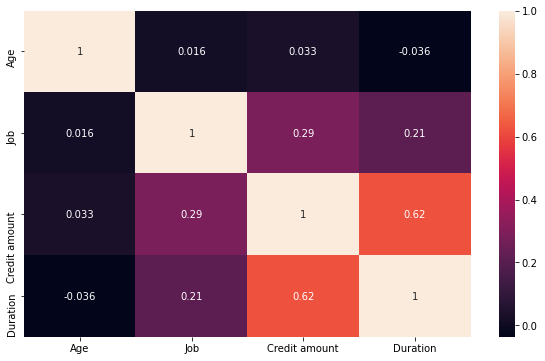

In [8]:
## Correlation plot

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

There is not much significant correlation among numerical columns

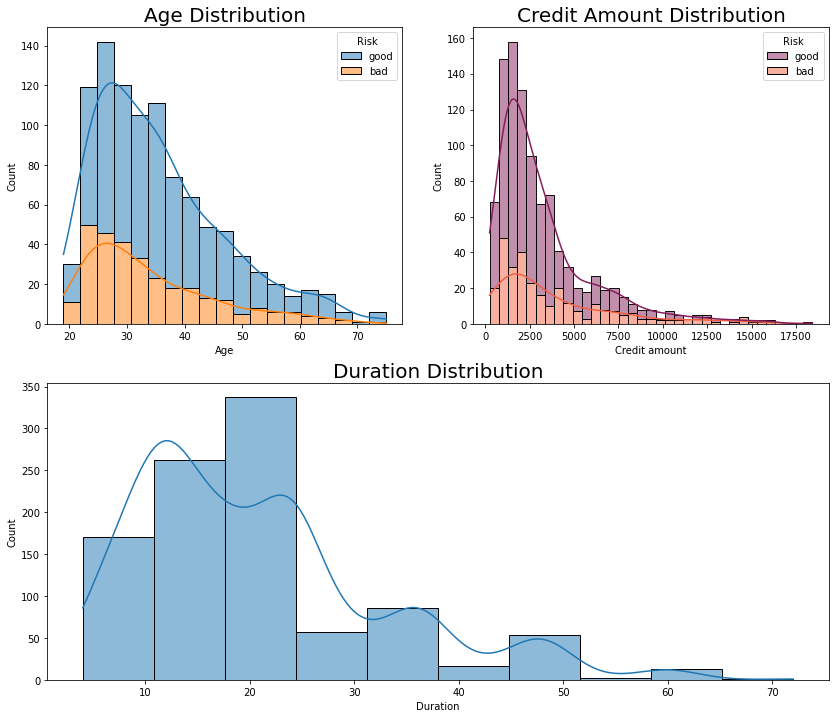

In [9]:
## Visualizing numerical columns using histograms

plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.histplot(data = data, x = 'Age', hue = 'Risk', multiple = 'stack', palette = 'tab10', kde = True)
ax1.set_title('Age Distribution', fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data= data, x = 'Credit amount', hue = 'Risk', multiple = 'stack', palette = 'rocket', kde = True)
ax2.set_title('Credit Amount Distribution', fontsize = 20)

plt.subplot(212)
ax3 = sns.histplot(data = data, x= "Duration", multiple = 'stack', palette = 'hls', kde = True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

- All graphs have a positive skew indicating that the mean is greater than the median

- Applicants between the ages of 20 to 30 are more likely to apply for a loan

- Applicants are less likely to apply for a high credit loan

- More loans have been paid off around 20 months after being issued

- The bank is more likely to receive applicants between the ages of 20 and 30 and request loans between 250 and 2500 DM

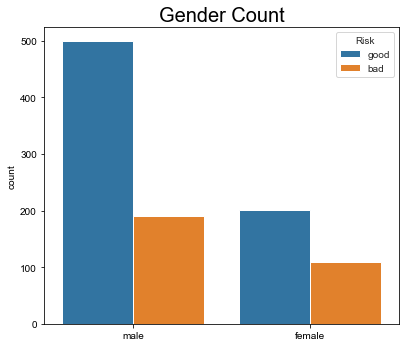

In [10]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
sns.set_style("whitegrid")

ax1 = sns.countplot(data=data, x='Sex', hue='Risk', palette='tab10')
ax1.set_title("Gender Count", fontsize=20)
ax1.set_xlabel("")

plt.show()


- About 2/5 of male applicants and 1/3 of female applicants are classified as bad

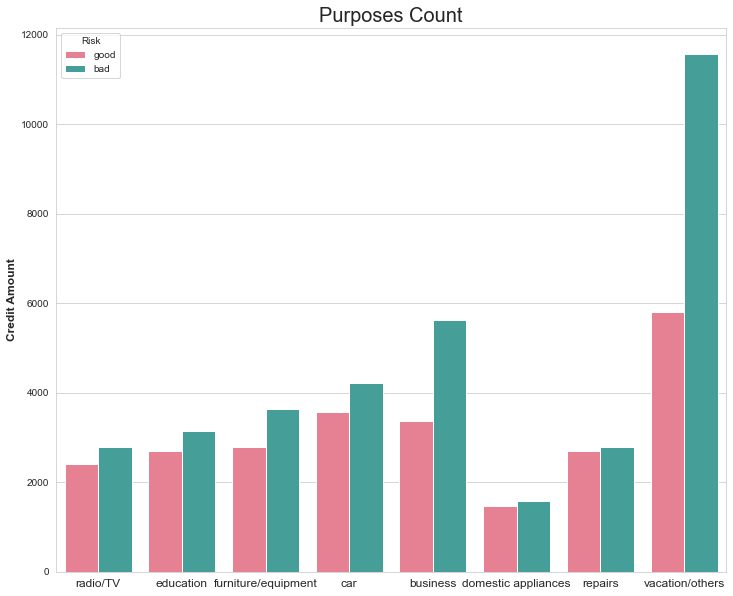

In [11]:
plt.figure(figsize = (12,10))

sns.set_style("whitegrid")

ax1 = sns.barplot(data=data, x="Purpose", y = "Credit amount", palette="husl", hue = "Risk", ci = None)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 12)
ax1.set_xlabel("")
ax1.set_ylabel("Credit Amount", fontsize = 12, fontdict={'weight': 'bold'})
ax1.set_title("Purposes Count", fontsize=20)

plt.show()

- A large portion of applicants requested loans for vacation/others, car and business


### Applying log transformation

We saw the above histograms for Age, Credit Amount and Duration are skewed, we will apply the log transformation to normalize these columns.

In [12]:
data['Age_norm'] = np.log(data['Age'])
data['Credit amount_norm'] = np.log(data['Credit amount'])
data['Duration_norm'] = np.log(data['Duration'])

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_norm,Credit amount_norm,Duration_norm
0,67,male,2,own,none,little,1169,6,radio/TV,good,4.204693,7.063904,1.791759
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,3.091042,8.691315,3.871201
2,49,male,1,own,little,none,2096,12,education,good,3.891820,7.647786,2.484907
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3.806662,8.972337,3.737670
4,53,male,2,free,little,little,4870,24,car,bad,3.970292,8.490849,3.178054


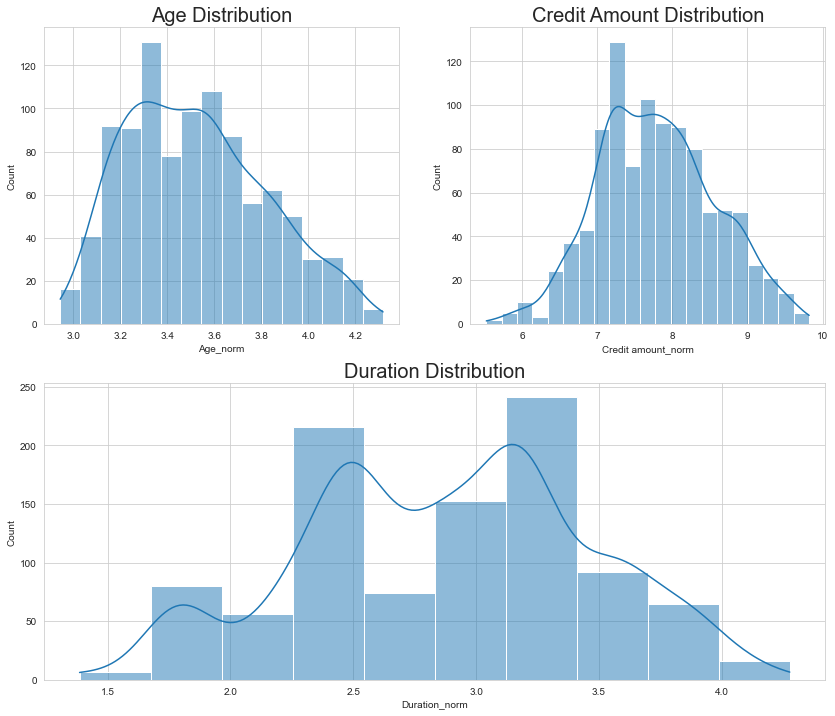

In [13]:
### Plotting histograms to verify the columns after log transformation are normalized

plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.histplot(data = data, x = 'Age_norm', palette = 'tab10', kde = True)
ax1.set_title('Age Distribution', fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data= data, x = 'Credit amount_norm', palette = 'rocket', kde = True)
ax2.set_title('Credit Amount Distribution', fontsize = 20)

plt.subplot(212)
ax3 = sns.histplot(data = data, x= "Duration_norm", kde = True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

- Looking at histograms we can say that the numerical columns now look more normalized.

### Feature Scaling

In [14]:
df = data.drop(['Age', 'Credit amount', 'Duration'], axis = 1)
df.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age_norm,Credit amount_norm,Duration_norm
0,male,2,own,none,little,radio/TV,good,4.204693,7.063904,1.791759
1,female,2,own,little,moderate,radio/TV,bad,3.091042,8.691315,3.871201
2,male,1,own,little,none,education,good,3.891820,7.647786,2.484907
3,male,2,free,little,little,furniture/equipment,good,3.806662,8.972337,3.737670
4,male,2,free,little,little,car,bad,3.970292,8.490849,3.178054


In [15]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age_norm', 'Credit amount_norm', 'Duration_norm']
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age_norm,Credit amount_norm,Duration_norm
0,male,2,own,none,little,radio/TV,good,2.271006,-0.933901,-1.864869
1,female,2,own,little,moderate,radio/TV,bad,-1.446152,1.163046,1.708369
2,male,1,own,little,none,education,good,1.226696,-0.181559,-0.673790
3,male,2,free,little,little,furniture/equipment,good,0.942455,1.525148,1.478913
4,male,2,free,little,little,car,bad,1.488620,0.904743,0.517289


In [16]:
df.describe()

,Job,Age_norm,Credit amount_norm,Duration_norm
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.904000,1.106226e-15,2.892131e-16,-3.730349e-17
std,0.653614,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,-1.935487e+00,-2.921366e+00,-2.561606e+00
25%,2.000000,-7.625864e-01,-7.337018e-01,-6.737898e-01
50%,2.000000,-9.278474e-02,-5.100511e-02,2.294689e-02
75%,2.000000,7.121696e-01,6.421928e-01,5.172894e-01
max,3.000000,2.647496e+00,2.619193e+00,2.405105e+00


After applying StandardScaler we can see that the mean of numerical columns `Age_norm`, `Credit amount_norm` and `Duration_norm` has become almost 0 and standard deviation is 1.

### Apply one-hot encoding to categorical features

In [17]:

#cat_cols = ['Sex', 'Job', 'Housing', 'Savings accounts', 'Checking account', ]
df_encoded = pd.get_dummies(df, drop_first = True)

In [18]:
df_encoded.head()

,Job,Age_norm,Credit amount_norm,Duration_norm,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,...,Checking account_none,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,2,2.271006,-0.933901,-1.864869,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,-1.446152,1.163046,1.708369,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1.226696,-0.181559,-0.673790,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,2,0.942455,1.525148,1.478913,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2,1.488620,0.904743,0.517289,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Plot Elbow graph

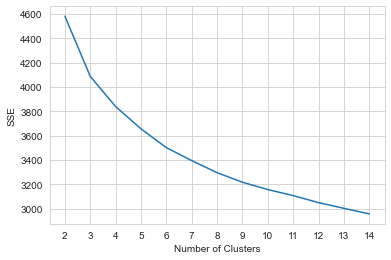

In [19]:
from sklearn.cluster import KMeans

## Using Elbow method to find the optimal number of clusters

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the elbow graph we can say that there was a sharp bend at 3 for number of clusters. We will take 3 as optimal value for number of clusters for further analysis

### Implementing KMeans 

In [20]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(df_encoded)

KMeans(n_clusters=3, random_state=5)

### Visualizing the clusters through PCA

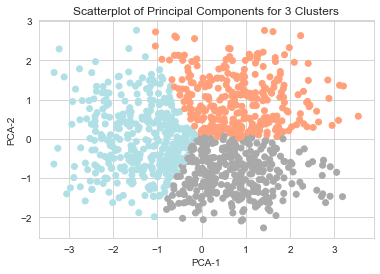

In [21]:
from sklearn.decomposition import PCA

### Covert the data into 2D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_encoded)

color_theme = np.array(['darkgray','lightsalmon', 'powderblue'])
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c= color_theme[clustering.labels_])
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Scatterplot of Principal Components for 3 Clusters')
plt.show()

We can clearly see the distinguished clusters along the two PCA components

### Implementing Naive-Bayes classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB

In [23]:
df_encoded.shape

(1000, 22)

In [24]:
features = df_encoded.iloc[:,0:21]
target = df_encoded.iloc[:,21]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=17)

In [26]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(classification_report(y_test, y_pred))

GaussianNB()
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        59
           1       0.78      0.77      0.77       141

    accuracy                           0.69       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.69      0.69       200



- We can see that the accuracy is only 0.69 for Naive Bayes classifier, which can be improved by trying other training algorithms 

#### Using KFold CV to objectively measure the accuracy of the classifier.

In [30]:
scores = cross_val_score(GausNB, X_train, y_train, cv=5, scoring = 'accuracy')

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.6375  0.70625 0.675   0.6125  0.73125]
0.6725


- Using the mean cross-validation, we can conclude that we expect the model to be around 67.25% accurate on average.

- Our original model accuracy is 0.69, but the mean cross-validation accuracy is 0.6725. So, the 5-fold cross-validation accuracy does not result in performance improvement for this model.

